In [1]:
import numpy as np
from MyML import *
import matplotlib.pyplot as plt

In [2]:
x1 = np.matrix(np.random.randn(200,2))*2+10
x2 = np.matrix(np.random.randn(200,2))

In [3]:
X = np.row_stack((x1,x2))
X = (X-np.min(X,axis = 0))/(np.max(X, axis = 0)-np.min(X,axis =0))

In [4]:
y1 = np.ones((200,1))
y2 = np.zeros((200,1))
Y = np.row_stack((y1,y2))

Weights not previously initialized. Initializing now.
1
Weights not previously initialized. Initializing now.
5
Weights not previously initialized. Initializing now.
1
Weights not previously initialized. Initializing now.
4
Weights not previously initialized. Initializing now.
1
Weights not previously initialized. Initializing now.
4
Weights not previously initialized. Initializing now.
2
Weights not previously initialized. Initializing now.
3
Weights not previously initialized. Initializing now.
5
Weights not previously initialized. Initializing now.
5


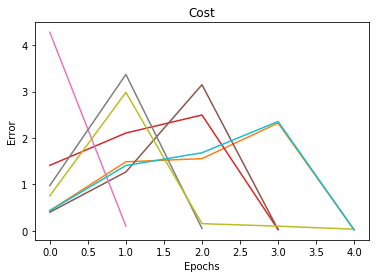

In [5]:
for i in range(0,10):
    neurmodel = TSNN(indims = 2, nodes = [1], taskType = 'c')
    neurmodel.train(X,Y, lr = .05)

# Median is 4.

1
5
1
6
6
1
1
5
5
5


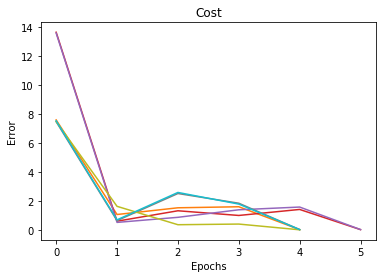

In [6]:
for i in range(0,10):
    adamodel = TSNNada(indims = 2, nodes = [1], taskType = 'c')
    adamodel.train(X,Y, lr = 12, epochs = 1000)

# Median is 5.

Weights not previously initialized. Initializing now.
2
Weights not previously initialized. Initializing now.
2
Weights not previously initialized. Initializing now.
3
Weights not previously initialized. Initializing now.
4
Weights not previously initialized. Initializing now.
3
Weights not previously initialized. Initializing now.
2
Weights not previously initialized. Initializing now.
3
Weights not previously initialized. Initializing now.
4
Weights not previously initialized. Initializing now.
3
Weights not previously initialized. Initializing now.
2


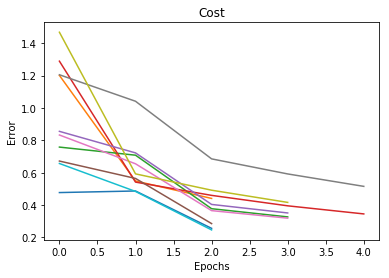

In [7]:
for i in range(0,10):
    rmsmodel = TSNNrms(indims = 2, nodes = [1], taskType = 'c')
    rmsmodel.train(X,Y, lr = .9, epochs = 1000, mu = 0)

# Median is 3.

(300, 2)


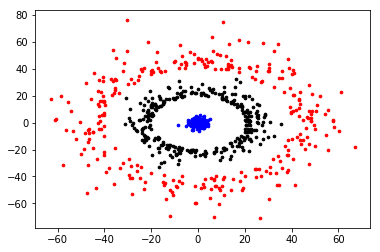

900


In [8]:
x1=np.random.randn(10000,2)*20
x2=np.random.randn(10000,2)*10
def ohe(matrix,cols):
    emp=np.matrix([])
    colsh=matrix.shape[1]
    print(len(matrix))
    for i in range(colsh):
        if i in cols:
            rows=len(matrix)
            z=np.unique(matrix[:,i])
            colu=(len(z))
            x=np.zeros((rows,colu))
            for v in range(0,len(matrix)):
                for j in range(0,len(z)):
                    if matrix[v,i] == z[j]:
                        x[v,j] = 1
                    else:
                        x[v,j] = 0
            if emp.size == 0:
                emp = x
            else:
                emp=np.hstack((emp,x))
        else:
            add= matrix[:,i]
            add=add.reshape((matrix.shape[0],1))
            if emp.size==0:
                emp=add
            else:
                print(add.shape)
                print(emp.shape)
                emp = np.hstack((emp,add))
    return(emp)
def normalize(X,xmin,xmax):
        xmin=X.min(0)
        xmax=X.max(0)
        nom=X-xmin
        denom=xmax-xmin
        return(nom/denom)
emp=np.array([[]])
emp2=np.array([[]])
sq=[]
for i in range(len(x1)):
    r=np.sqrt(x1[i,0]**2+x1[i,1]**2)
    r2=np.sqrt(x2[i,0]**2+x2[i,1]**2)
    sq.append(r)
    if (r >= 40):
    
        if(emp.size==0):
            
            g=np.hstack((x1[i,0],x1[i,1]))
            emp=g[0:300,]
        else:
            k=np.hstack((x1[i,0],x1[i,1]))
            
            emp=np.vstack((emp,k))[0:300,]
    if (40>r2>20):
        if(emp2.size==0):
            n=np.hstack((x2[i,0],x2[i,1]))
            emp2=n[0:300,]
        else:
            m=np.hstack((x2[i,0],x2[i,1]))
            emp2=np.vstack((emp2,m))[0:300,]
            
print(emp2.shape)
h=np.size(emp)
x3=np.random.randn(emp.shape[0],2)*2
plt.scatter(x3[:,0],x3[:,1],c='blue', s= 7)
plt.scatter(emp[:,0],emp[:,1],c='red', s= 7)
plt.scatter(emp2[:,0],emp2[:,1],c='black', s= 7)
plt.show()
X=np.vstack((x3,emp,emp2))
# X = (X - np.min(X, axis = 0))/(np.max(X, axis = 0)-np.min(X, axis = 0))
Y1=np.ones((emp.shape[0])).reshape(emp.shape[0],1)
Y2=np.zeros((emp2.shape[0])).reshape(emp2.shape[0],1)
Y3=np.array([[2]]*x3.shape[0])
Y=np.vstack((Y1,Y2,Y3)).reshape(X.shape[0],1)
Y=ohe(Y,[0])

In [9]:
X = (X-np.min(X, axis = 0))/(np.max(X)-np.min(X))

The 0 got 1 acc in:
1955
The 1 got 1 acc in:
1084
The 2 got 1 acc in:
1068
The 3 got 1 acc in:
1138
The 4 got 1 acc in:
1039
The 5 got 1 acc in:
1952
The 6 got 1 acc in:
1680
The 7 got 1 acc in:
1263
The 8 got 1 acc in:
854
The 9 got 1 acc in:
1236


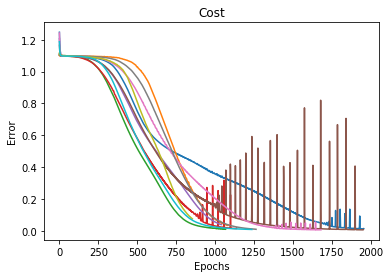

In [22]:
for i in range(0,10):
    print('The '+str(i)+' got 1 acc in:')
    prelurmsmodel = NeuralNetwork(indims = 2, nodes = [20,20,20,3],activations = ['prelu','prelu','prelu'] ,taskType = 'c', rms = 1)
    prelurmsmodel.train(X,Y,epochs = 4000,lr = .001, gamma = .9)

# The median was 1263

The 0 got 1 acc in:
808
The 1 got 1 acc in:
The 2 got 1 acc in:
The 3 got 1 acc in:
1497
The 4 got 1 acc in:
1287
The 5 got 1 acc in:
The 6 got 1 acc in:
2583
The 7 got 1 acc in:
1017
The 8 got 1 acc in:
2052
The 9 got 1 acc in:


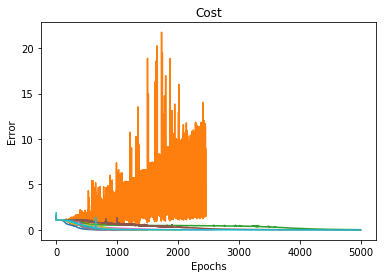

In [40]:
for i in range(0,10):
    print('The '+str(i)+' got 1 acc in:')
    prelurmsmodel = NeuralNetwork(indims = 2, nodes = [20,20,20,3],activations = ['prelu','prelu','prelu'] ,taskType = 'c', ada = 1)
    prelurmsmodel.train(X,Y,epochs = 5000,lr = .025)

# The median number was 2583

The 0 got 1 acc in:


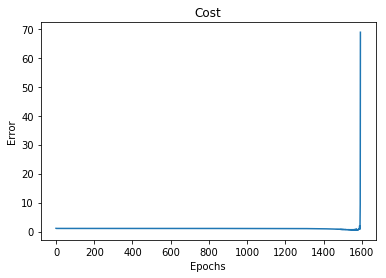

In [65]:
for i in range(0,1):
    print('The '+str(i)+' got 1 acc in:')
    prelurmsmodel = NeuralNetwork(indims = 2, nodes = [20,20,20,3],activations = ['prelu','prelu','prelu'] ,taskType = 'c')
    prelurmsmodel.train(X,Y,epochs = 6000,lr = .00005)